In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import pyclustertend
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Data/movies.csv', encoding='iso-8859-1')

columns_to_drop = ['id', 'originalTitle', 'genres',
                   'originalLanguage',
                   'title', 'homePage', 'video', 'director',
                    'productionCompany',
                    'productionCompanyCountry',
                    'productionCountry', 'releaseDate',
                    'actors', 'actorsCharacter']
df = df.drop(columns=columns_to_drop)

df.fillna(0, inplace=True)

In [70]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df = df.dropna()

X = np.array(df[['budget', 'popularity', 'revenue',
                 'runtime', 'voteAvg',
                 'genresAmount',
                 'productionCoAmount',
                 'productionCountriesAmount',
                 'actorsAmount', 'castWomenAmount',
                 'castMenAmount']])
Y = np.array(df['popularity'])
X.shape

(10000, 11)

In [71]:
random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

round(pyclustertend.hopkins(X, len(X)), 2)

np.float64(0.01)

In [ ]:
pyclustertend.vat(X_scale) # Probar luego

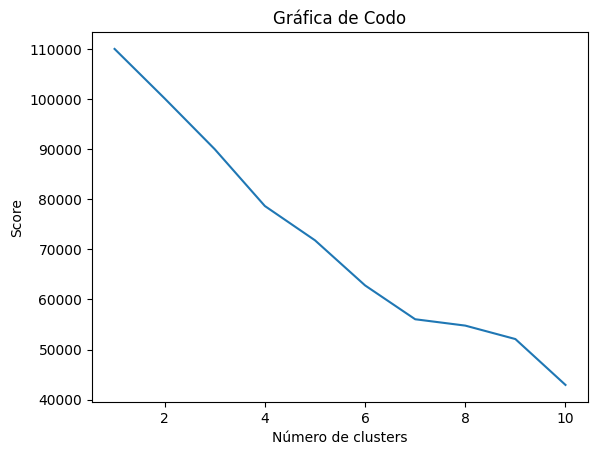

In [72]:
numeroClusters = range(1, 11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)
    
plt.plot(numeroClusters, wcss)
plt.title('Gráfica de Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

K = 4

For n_clusters = 4 The average silhouette_score is : 0.6604103715549801


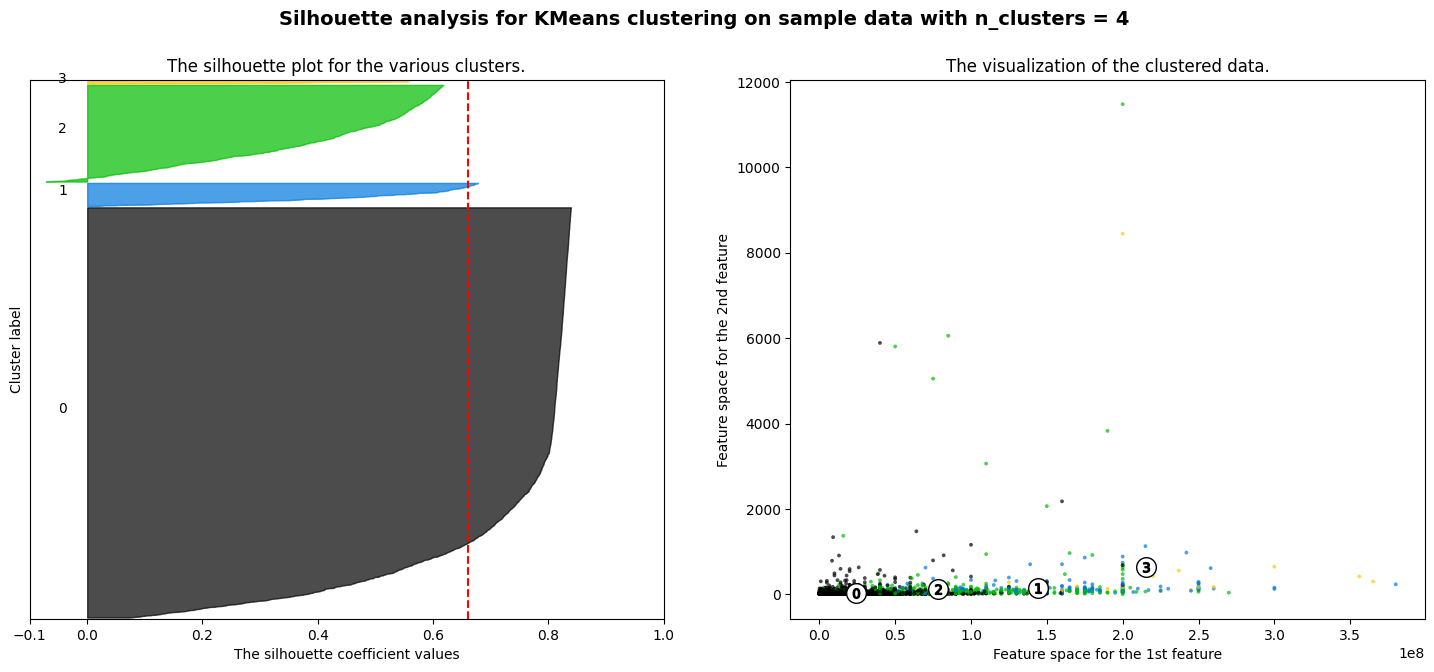

In [82]:
range_n_clusters = [4]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()